In [1]:
import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#IMAGE PREPROCESSING
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,                                   
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('training_data',                                                 
                                                 target_size=(256, 256),
                                                 batch_size=4,
                                                 class_mode='categorical')

validation_set = validation_datagen.flow_from_directory('validation_data',                                                        
                                                        target_size=(256, 256),
                                                        batch_size=4,
                                                        class_mode='categorical')

Found 45 images belonging to 7 classes.
Found 19 images belonging to 7 classes.


In [3]:
model = Sequential()

model.add(Convolution2D(64, 3,3, input_shape=(256,256,3), activation=('relu')))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Convolution2D(128, 3,3, activation=('relu')))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=(['accuracy']))

In [4]:
model.fit(
        training_set,
        epochs=75,
        validation_data=validation_set)

Epoch 1/75
12/12 [==============================] - 8s 645ms/step - loss: 4.6972 - accuracy: 0.0667 - val_loss: 1.9974 - val_accuracy: 0.1579
Epoch 2/75
12/12 [==============================] - 7s 555ms/step - loss: 3.7326 - accuracy: 0.1556 - val_loss: 2.0219 - val_accuracy: 0.1053
Epoch 3/75
12/12 [==============================] - 6s 525ms/step - loss: 2.7528 - accuracy: 0.2222 - val_loss: 1.9923 - val_accuracy: 0.1053
Epoch 4/75
12/12 [==============================] - 6s 538ms/step - loss: 2.6691 - accuracy: 0.2444 - val_loss: 1.9754 - val_accuracy: 0.1579
Epoch 5/75
12/12 [==============================] - 6s 517ms/step - loss: 2.4121 - accuracy: 0.2889 - val_loss: 1.9754 - val_accuracy: 0.1053
Epoch 6/75
12/12 [==============================] - 6s 533ms/step - loss: 3.1788 - accuracy: 0.2444 - val_loss: 1.9753 - val_accuracy: 0.1579
Epoch 7/75
12/12 [==============================] - 7s 544ms/step - loss: 3.2729 - accuracy: 0.2000 - val_loss: 2.0483 - val_accuracy: 0.1053
Epoch 

12/12 [==============================] - 7s 564ms/step - loss: 0.9533 - accuracy: 0.6000 - val_loss: 1.6374 - val_accuracy: 0.3158
Epoch 59/75
12/12 [==============================] - 6s 532ms/step - loss: 0.9706 - accuracy: 0.6222 - val_loss: 1.6944 - val_accuracy: 0.2632
Epoch 60/75
12/12 [==============================] - 7s 543ms/step - loss: 1.0826 - accuracy: 0.6222 - val_loss: 1.8343 - val_accuracy: 0.3158
Epoch 61/75
12/12 [==============================] - 7s 571ms/step - loss: 0.8165 - accuracy: 0.6667 - val_loss: 1.8957 - val_accuracy: 0.3158
Epoch 62/75
12/12 [==============================] - 6s 540ms/step - loss: 0.8555 - accuracy: 0.6444 - val_loss: 1.8654 - val_accuracy: 0.3158
Epoch 63/75
12/12 [==============================] - 6s 528ms/step - loss: 1.0796 - accuracy: 0.6222 - val_loss: 1.7260 - val_accuracy: 0.3158
Epoch 64/75
12/12 [==============================] - 6s 541ms/step - loss: 1.1536 - accuracy: 0.6222 - val_loss: 1.7456 - val_accuracy: 0.4737
Epoch 65/75

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 85, 85, 64)        1792      
_________________________________________________________________
dropout (Dropout)            (None, 85, 85, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 42, 42, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0

<AxesSubplot:>

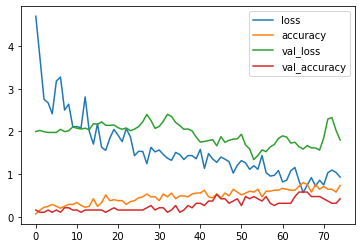

In [6]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [7]:
predictions = model.predict(x = validation_set)

In [8]:
predictions = np.argmax(predictions, axis=-1)

for i in predictions:
    print(i)

4
6
2
1
2
3
1
6
3
6
6
6
3
6
5
6
0
6
6


In [9]:
training_set.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<AxesSubplot:>

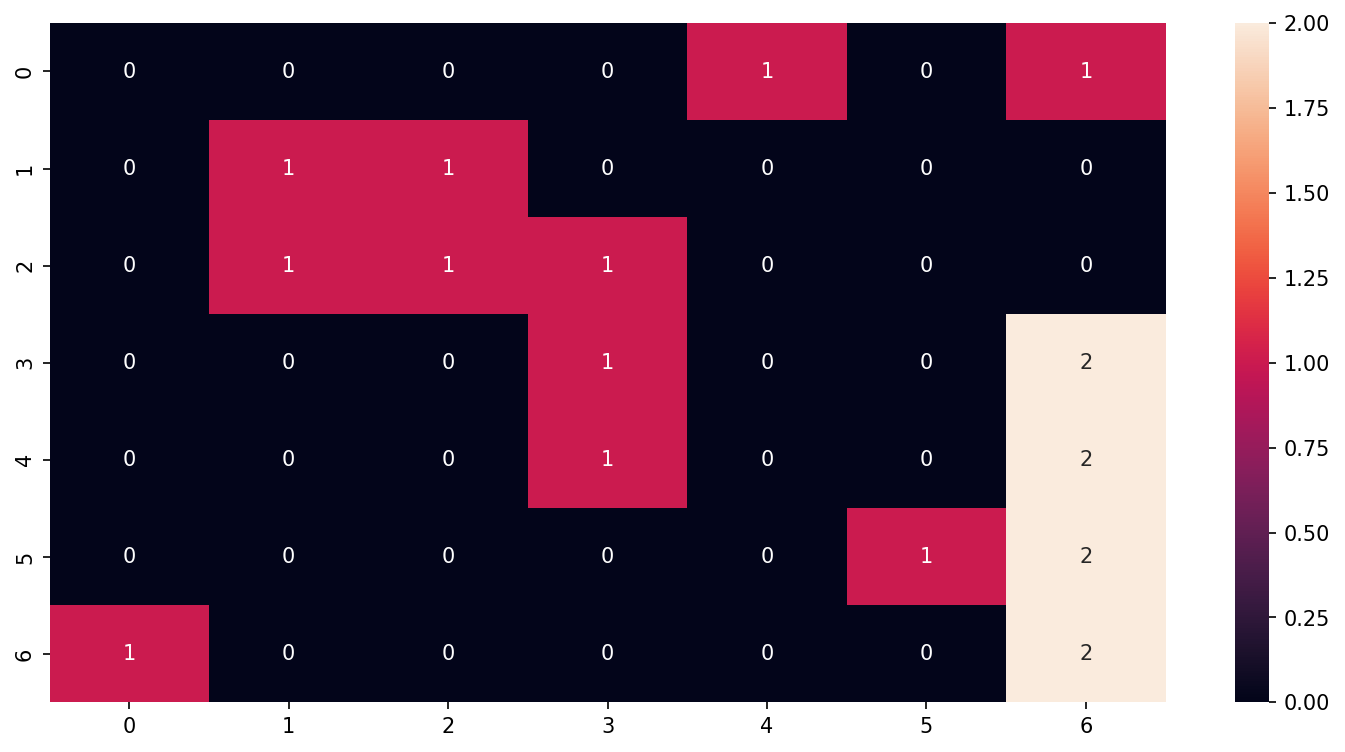

In [11]:
plt.figure(figsize=(12,6), dpi = 150)
cm = confusion_matrix(validation_set.labels, predictions)

sns.heatmap(cm, annot=True)